# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [258]:
import pandas as pd
import numpy as np

# importing Iris
df_Iris = pd.read_csv("Iris.csv")

# printing sample rows from the dataset using sample()
df_Iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
116,117,6.5,3.0,5.5,1.8,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
112,113,6.8,3.0,5.5,2.1,Iris-virginica
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [259]:
# finding the number of missing columns
df_Iris.isnull().sum()

# there are no null columns in the dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Fill missing values with median of that particular column

In [260]:
# filling the missing values
df_Iris.fillna(df_Iris.median())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Question 3

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [261]:
# converting the Species column to integer for classification 
from sklearn import preprocessing
df_Iris['Species'] = preprocessing.LabelEncoder().fit_transform(df_Iris['Species'])
df_Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [264]:
# checking for the correlation with the target variable
df_Iris_corr = df_Iris.loc[:,((df_Iris.corr()['Species'] < -0.1) | (df_Iris.corr()['Species'] > 0.1))]

df_Iris_corr.shape #hence the dataset is matching the parent dataset

(150, 6)

### Question 4

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [265]:
df_Iris_var = df_Iris.loc[:,df_Iris.var()>= 0.1]
df_Iris_var.shape #hence the dataset is matching the parent dataset


(150, 6)

### Question 5

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

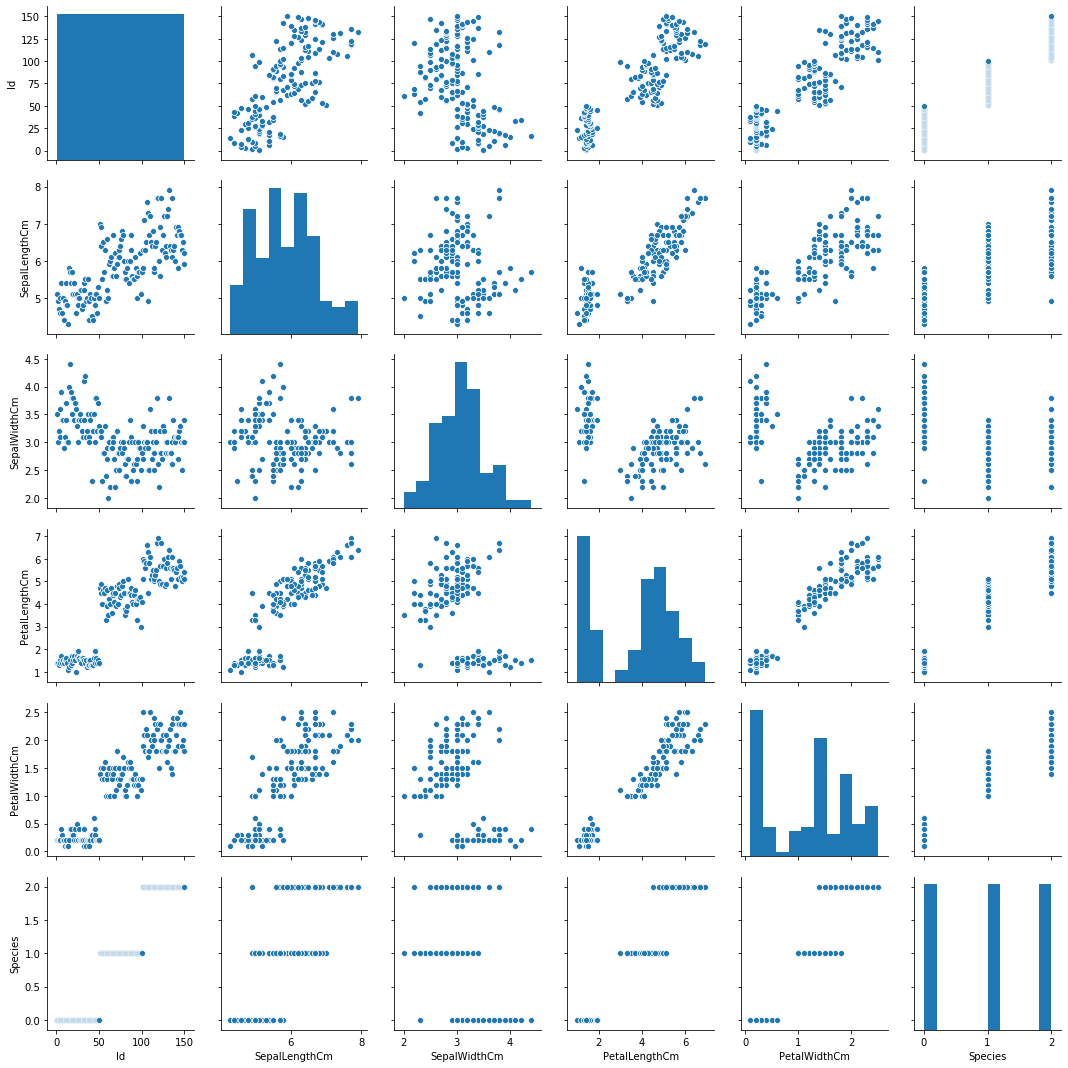

In [104]:
import seaborn as sns
sns.pairplot(df_Iris)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029AD3C9FA48>,
      dtype=object)

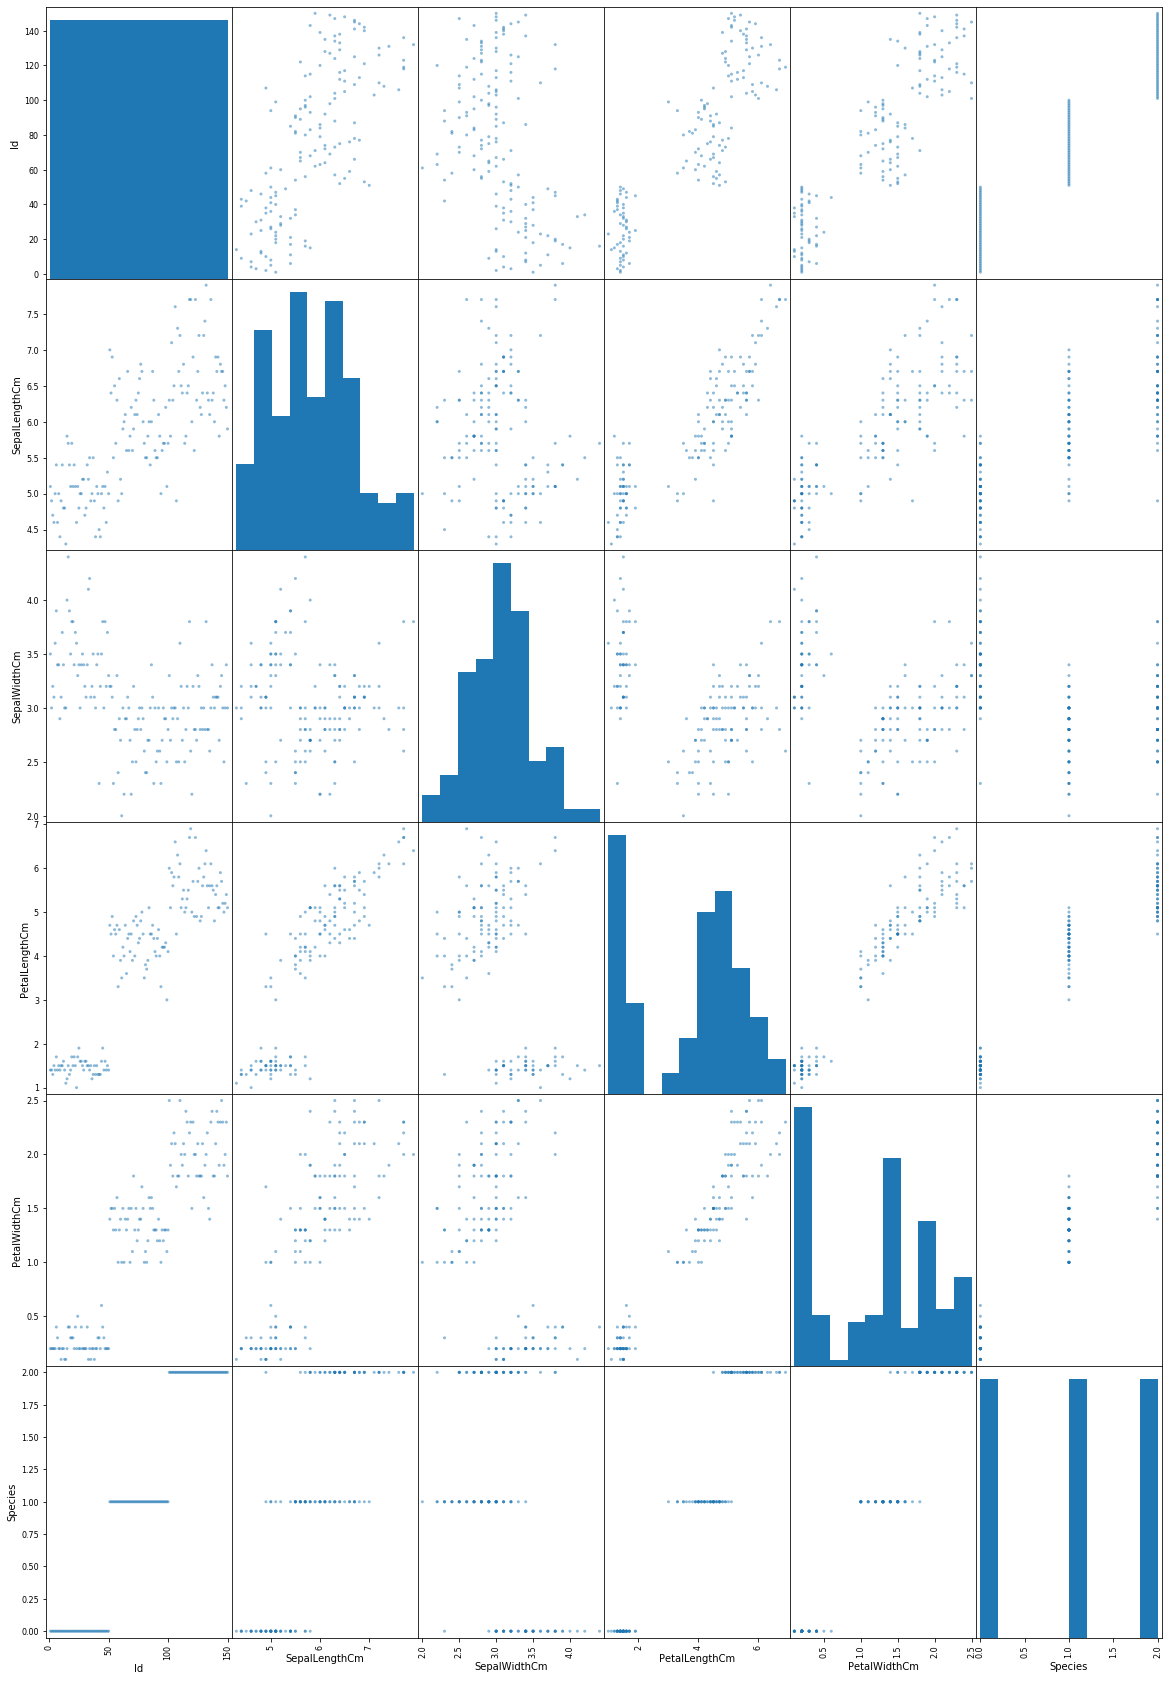

In [108]:
pd.plotting.scatter_matrix(df_Iris, figsize=(20,30))

## Build Model

### Question 6

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [272]:
#Divide the dataset into feature set and target set
x = df_Iris.iloc[:,1:5] # feature dataset
y = df_Iris.loc[:,'Species'] # target dataset

In [282]:
#Divide the Training and Test sets in 70:30
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.3, random_state = 6)


In [283]:
#testing the accuracy for different models

knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("For K = 3 the accuracy is" ,accuracy_score(y_pred, y_test))

knn2 = KNeighborsClassifier(5)
knn2.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("For K = 5 the accuracy is" ,accuracy_score(y_pred, y_test))

knn3 = KNeighborsClassifier(9)
knn3.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("For K = 9 the accuracy is" ,accuracy_score(y_pred, y_test))

For K = 3 the accuracy is 0.9555555555555556
For K = 5 the accuracy is 0.9555555555555556
For K = 9 the accuracy is 0.9555555555555556


# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [364]:
# read data from bc2
df_bc2  = pd.read_csv("bc2.csv")

# printing sample rows from the dataset using sample()
df_bc2.sample(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
633,1253955,8,7,4,4,5,3,5,10,1,4
603,1352663,5,4,6,8,4,1,8,10,1,4
427,1266154,8,7,8,2,4,2,5,10,1,4
348,832226,3,4,4,10,5,1,3,3,1,4
606,353098,4,1,1,2,2,1,1,1,1,2
581,878358,5,7,10,6,5,10,7,5,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
218,1223793,6,10,7,7,6,4,8,10,2,4
256,1182404,3,1,1,1,2,1,1,1,1,2
11,1036172,2,1,1,1,2,1,2,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [365]:
print(df_bc2.shape) # number of records in the dataset
df_bc2.dtypes # type of each column

(699, 11)


ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [366]:
df_bc2.describe() #statistical summary

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [367]:
df_bc2.isnull().sum() # no missing values

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [368]:
df_bc2_question =  df_bc2[df_bc2['Bare Nuclei'] == '?']
df_bc2_question.shape # finding the number of "?"

(16, 11)

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [369]:
df_bc2.describe(include='all') # finding the top value 

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [370]:
df_bc2['Bare Nuclei'].replace({'?': 1}, inplace = True) #replacing the "?" with the value 1
df_bc2.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Question 5
#### Find the distribution of target variable (Class) 

In [371]:
import matplotlib.pyplot as plt

df_bc2['Class'].value_counts() #finding the distribution of the variable class

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

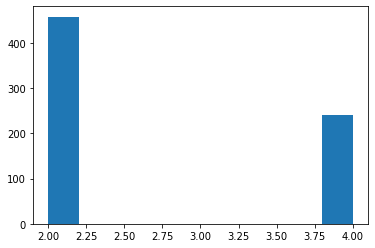

In [372]:
graph = plt.hist(df_bc2['Class'])

#### Convert the datatype of Bare Nuclei to `int`

In [373]:
df_bc2['Bare Nuclei'] = df_bc2['Bare Nuclei'].astype(int)
df_bc2.dtypes #validating the Bare Nuclei column data type

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

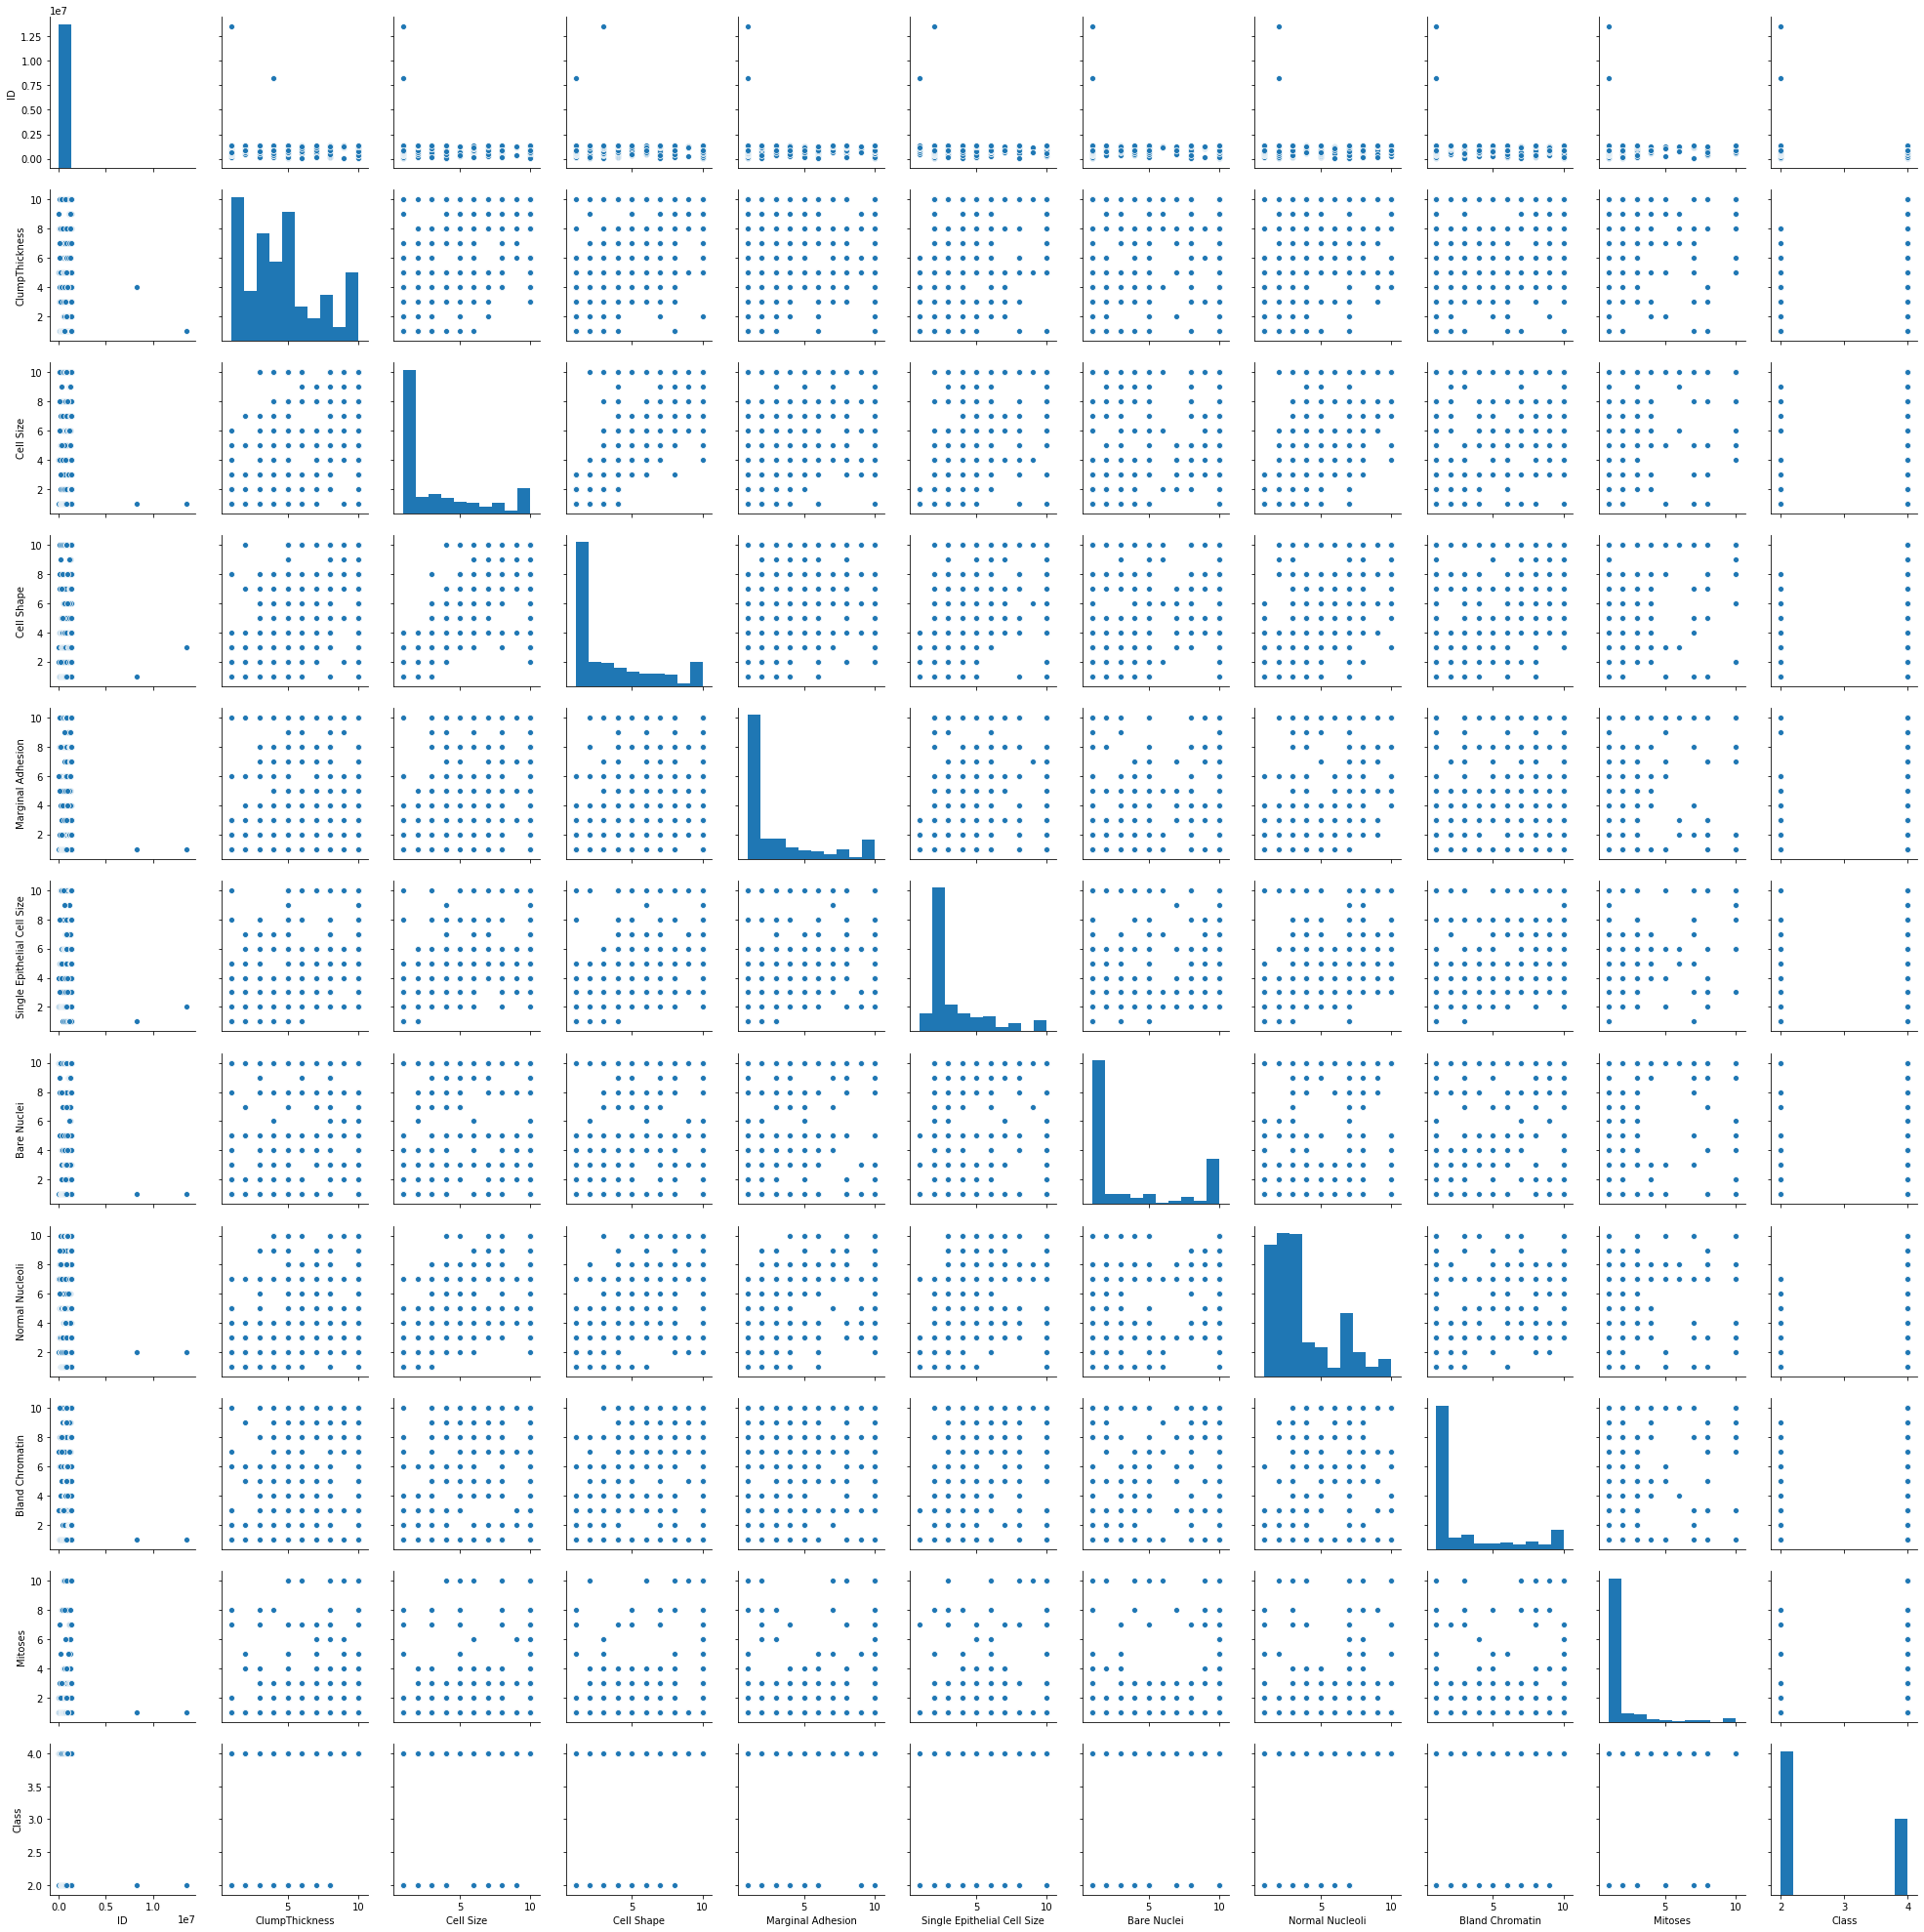

In [233]:
sns.pairplot(df_bc2)

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [387]:
x_dataset = df_bc2.iloc[:,1:10] #feature dataset
x_dataset.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [388]:
y_dataset = df_bc2.loc[:,'Class'] #target dataset
y_dataset.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

#### Divide the Training and Test sets in 70:30 

In [397]:
x_train_bc2, x_test_bc2, y_train_bc2, y_test_bc2 = train_test_split(x_dataset, y_dataset ,test_size = 0.3, random_state = 6)

In [398]:
sd = preprocessing.StandardScaler() #scaling the data
sd_train = sd.fit_transform(x_train_bc2)
sd_test = sd.fit_transform(x_test_bc2)


## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [399]:
knn_1 = KNeighborsClassifier(3)
knn_1.fit(x_train_bc2,y_train_bc2)
y_pred_bc = knn_1.predict(x_test_bc2)
print("For K = 3 the accuracy is" ,accuracy_score(y_pred_bc, y_test_bc2))

knn_2 = KNeighborsClassifier(5)
knn_2.fit(x_train_bc2,y_train_bc2)
y_pred_bc = knn_2.predict(x_test_bc2)
print("For K = 5 the accuracy is" ,accuracy_score(y_pred_bc, y_test_bc2))

knn_3 = KNeighborsClassifier(9)
knn_3.fit(x_train_bc2,y_train_bc2)
y_pred_bc = knn_3.predict(x_test_bc2)
print("For K = 9 the accuracy is" ,accuracy_score(y_pred_bc, y_test_bc2))


For K = 3 the accuracy is 0.9523809523809523
For K = 5 the accuracy is 0.9380952380952381
For K = 9 the accuracy is 0.9428571428571428
